
<h1>Simple image processing</h1>
<h3>Rodrigo Ildefonso Roman Guzman</h3>

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [6]:
import numpy as np
import cv2
from matplotlib import image as mpimg
import matplotlib.pyplot as plt


# Part 1


* **What are pixel-to-pixel photometric transformations used for image quantity augmentation?**


Data augmentation of the input space, also called pixel-to-pixel, is considered a type of approach that directly modifies the input image (or parts of it) to achieve variability to improve generalization.

The main advantage of sample space data augmentation techniques is that they are more intuitive and can be designed to specifically generate the desired augmentations for a particular task through simple transformation operations, applicable both globally and locally.

There are several libraries that allow for manual image augmentation, but this is tedious compared to using deep learning frameworks or specialized code libraries like Augmentor.

Currently, due to this limitation, image and video editing tools are rarely used in practice. Many recent deep learning networks incorporate transformation operations directly into the learning process, modifying the training data in each input epoch. This reduces the amount of resources needed for data augmentation.

There are **three** data augmentation techniques in the medical area:

1. **Geometric augmentation**: these are all those that alter the geometric structure of the images by changing the image pixels from their original positions to new positions without modifying the pixel values; thus better describing real-world appearance changes caused by factors such as viewpoint variations, non-rigid deformations, perspective, and scale changes. They include transformations such as cropping, rotation, scaling, and translation.

2. **Photometric augmentation**: images can be affected by various reasons, such as camera conditions and shooting conditions, color artifacts, and image data corruption. These effects can be emulated through digital processing that can be used in the training process to achieve a more accurate and robust visual understanding. Some techniques involve changes in pixel values, such as contrast, sharpness, blur, brightness, and color changes.

3. **Structural augmentation**: in the medical field, these augmentations include things like adding tissue and artifacts that might occur during recording (such as tubes, polarization fields, white lines, etc.). It is less common for general computer vision problems, but an approach like cropping could be seen as structural augmentation.

In this case study, we will use geometric and photometric transformations.

* Geometric: rotation, cropping, and compression.
* Photometric: Brightness adjustment (log), histogram equalization.


(1600, 756, 3)
(266, 378)


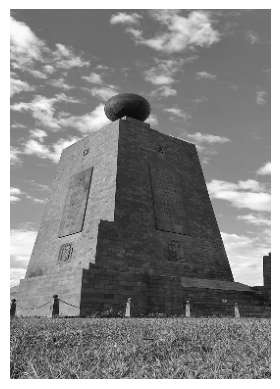

In [11]:
# Image 1 
# Geometric augmentation 
# Ajust the size
image = cv2.imread("simple_img_process/img_ex_1.jpeg", 0) 
image_1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image_1.shape)
dsize = (int(image_1.shape[0]/6), int(image_1.shape[1]/2))
output_1 = cv2.resize(image_1, dsize)
print(dsize)
plt.imshow(output_1)
plt.title('Geometric augmentation')
plt.axis('off')  # Hide axis
plt.show()

(378, 266, 3)


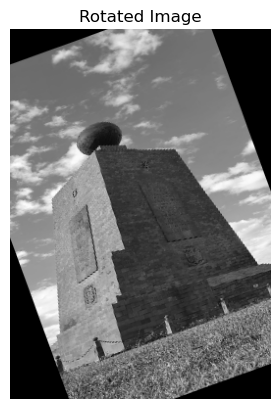

In [17]:
# Rotation
# Get the dimensions of the image
rows, cols,_ = output_1.shape

# Define the rotation parameters
grados_rota = 20
rotacion = cv2.getRotationMatrix2D((cols / 2, rows / 2), grados_rota, 1)

# Apply the rotation
dst = cv2.warpAffine(output_1, rotacion, (cols, rows))

# Use matplotlib to display the image
plt.imshow(dst)  
plt.title('Rotated Image')
plt.axis('off')  # Hide the axes
plt.show()

(378, 266, 3)


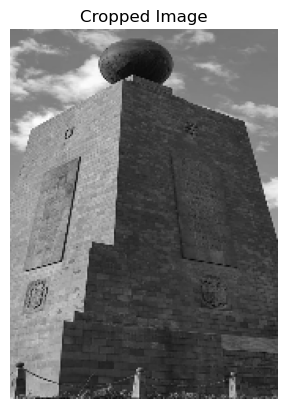

In [18]:
# Cropping
print(output_1.shape)
output_1R = output_1[80:315,40:210]
plt.imshow(output_1R)  
plt.title('Cropped Image')
plt.axis('off')  # Hide the axes
plt.show()

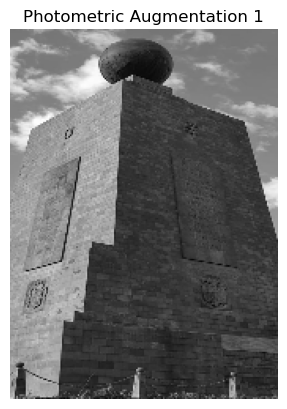

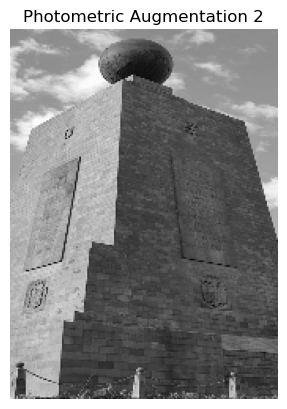

In [26]:
# Photometric Augmentation
# Brightness Adjustment - Increasing and Decreasing Contrast
imF_1 = (100.0/255)*output_1R + 100

# Normalize the transformed data
imF_1_normalized = (imF_1 - np.min(imF_1)) / (np.max(imF_1) - np.min(imF_1))

# Display the image using matplotlib
plt.imshow(imF_1_normalized, cmap='gray')  
plt.title('Photometric Augmentation 1')
plt.axis('off')
plt.show()

imF_1 = 255.0 * (np.log((output_1R / 255.0) + 1))
# Normalize the transformed data
imF_1_normalized = (imF_1 - np.min(imF_1)) / (np.max(imF_1) - np.min(imF_1))

# Display using matplotlib
plt.imshow(imF_1_normalized, cmap='gray')
plt.title('Photometric Augmentation 2')
plt.axis('off')
plt.show()

In [27]:
# Function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

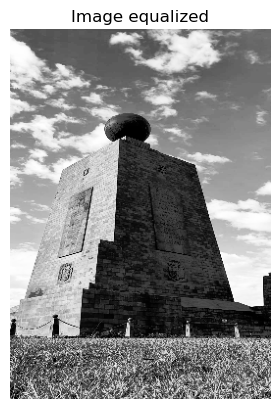

In [28]:
imF_Ecua1 = histeq(output_1)
plt.imshow(imF_Ecua1, cmap='gray')
plt.title('Image equalized')
plt.axis('off')
plt.show()

(1600, 900, 3)
(266, 450)


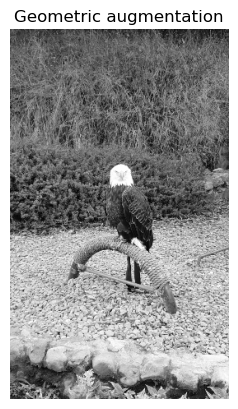

In [36]:
# Image 2 
# Geometric augmentation 
# Ajust the size
image_2 = cv2.imread("simple_img_process/img_ex_2.jpeg", 0) 
image_2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image_2.shape)
dsize = (int(image_2.shape[0]/6), int(image_2.shape[1]/2))
output_2 = cv2.resize(image_2, dsize)
print(dsize)
plt.imshow(output_2)
plt.title('Geometric augmentation')
plt.axis('off')  # Hide axis
plt.show()

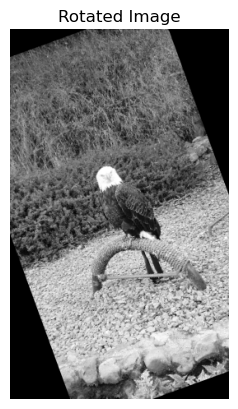

In [37]:
# Rotation
# Get the dimensions of the image
rows, cols,_ = output_2.shape


# Define the rotation parameters
grados_rota = 20
rotacion = cv2.getRotationMatrix2D((cols / 2, rows / 2), grados_rota, 1)

# Apply the rotation
dst = cv2.warpAffine(output_2, rotacion, (cols, rows))

# Use matplotlib to display the image
plt.imshow(dst)  
plt.title('Rotated Image')
plt.axis('off')  # Hide the axes
plt.show()

(450, 266, 3)


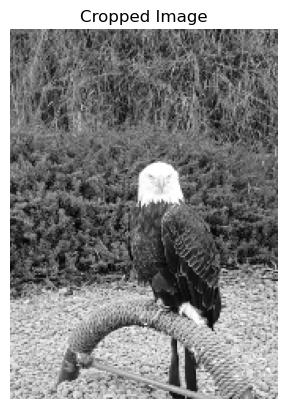

In [38]:
# Cropping
print(output_2.shape)
output_2R = output_2[80:315,40:210]
plt.imshow(output_2R)  
plt.title('Cropped Image')
plt.axis('off')  # Hide the axes
plt.show()

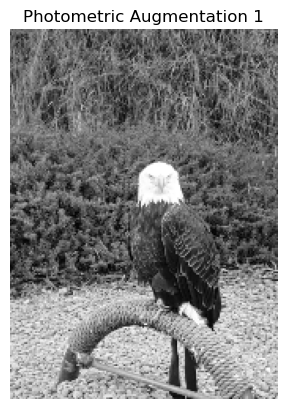

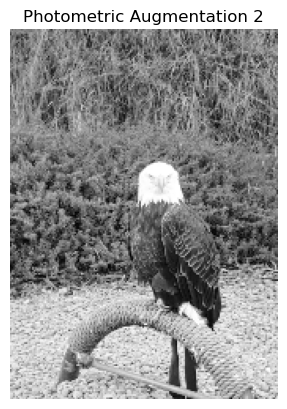

In [40]:
# Photometric Augmentation
# Brightness Adjustment - Increasing and Decreasing Contrast
imF_2 = (100.0/255)*output_2R + 100

# Normalize the transformed data
imF_2_normalized = (imF_2 - np.min(imF_2)) / (np.max(imF_2) - np.min(imF_2))

# Display the image using matplotlib
plt.imshow(imF_2_normalized, cmap='gray')  
plt.title('Photometric Augmentation 1')
plt.axis('off')
plt.show()

imF_2 = 255.0 * (np.log((output_2R / 255.0) + 1))
# Normalize the transformed data
imF_2_normalized = (imF_2 - np.min(imF_2)) / (np.max(imF_2) - np.min(imF_2))

# Display using matplotlib
plt.imshow(imF_2_normalized, cmap='gray')
plt.title('Photometric Augmentation 2')
plt.axis('off')
plt.show()

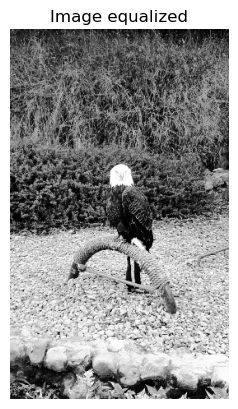

In [41]:
# Histogram equalization
imF_Ecua2 = histeq(output_2)
plt.imshow(imF_Ecua2, cmap='gray')
plt.title('Image equalized')
plt.axis('off')
plt.show()

(1440, 1440, 3)
(720, 240)


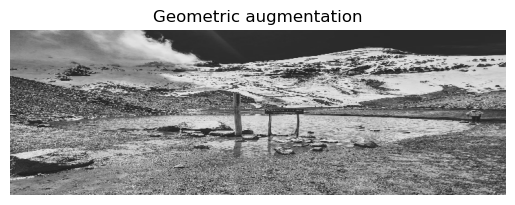

In [45]:
# Image 3
# Geometric augmentation 
# Ajust the size
image_3 = cv2.imread("simple_img_process/img_ex_3.jpeg", 0) 
image_3 = cv2.cvtColor(image_3, cv2.COLOR_BGR2RGB)
print(image_3.shape)
dsize = (int(image_3.shape[0]/2), int(image_3.shape[1]/6))
output_3 = cv2.resize(image_3, dsize)
print(dsize)
plt.imshow(output_3)
plt.title('Geometric augmentation')
plt.axis('off')  # Hide axis
plt.show()

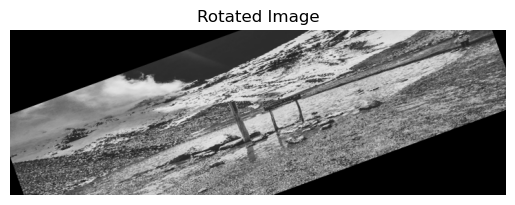

In [46]:
# Rotation
# Get the dimensions of the image
rows, cols,_ = output_3.shape


# Define the rotation parameters
grados_rota = 20
rotacion = cv2.getRotationMatrix2D((cols / 2, rows / 2), grados_rota, 1)

# Apply the rotation
dst = cv2.warpAffine(output_3, rotacion, (cols, rows))

# Use matplotlib to display the image
plt.imshow(dst)  
plt.title('Rotated Image')
plt.axis('off')  # Hide the axes
plt.show()

(240, 720, 3)


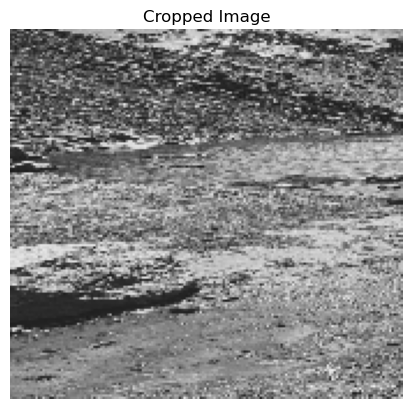

In [47]:
# Cropping
print(output_3.shape)
output_3R = output_3[80:315,40:210]
plt.imshow(output_3R)  
plt.title('Cropped Image')
plt.axis('off')  # Hide the axes
plt.show()

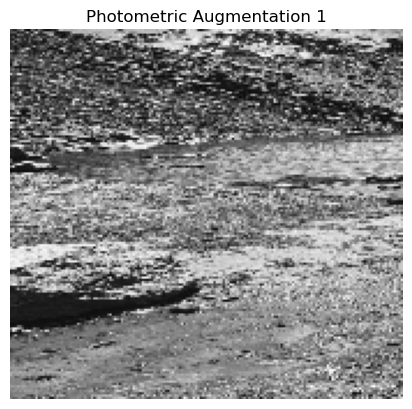

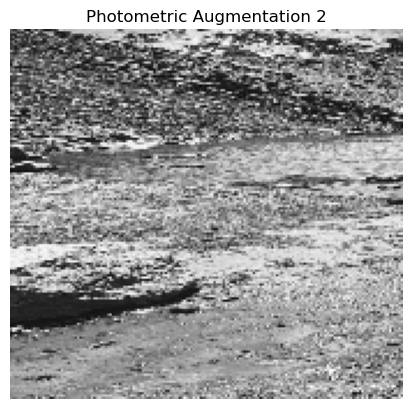

In [49]:
# Photometric Augmentation
# Brightness Adjustment - Increasing and Decreasing Contrast
imF_3 = (100.0/255)*output_3R + 100

# Normalize the transformed data
imF_3_normalized = (imF_3 - np.min(imF_3)) / (np.max(imF_3) - np.min(imF_3))

# Display the image using matplotlib
plt.imshow(imF_3_normalized, cmap='gray')  
plt.title('Photometric Augmentation 1')
plt.axis('off')
plt.show()

imF_3 = 255.0 * (np.log((output_3R / 255.0) + 1))
# Normalize the transformed data
imF_3_normalized = (imF_3 - np.min(imF_3)) / (np.max(imF_3) - np.min(imF_3))

# Display using matplotlib
plt.imshow(imF_3_normalized, cmap='gray')
plt.title('Photometric Augmentation 2')
plt.axis('off')
plt.show()

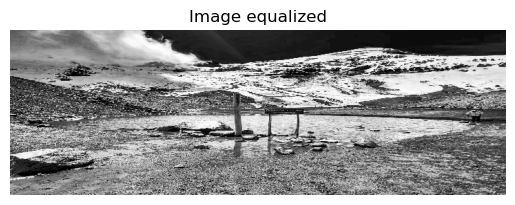

In [51]:
# Histogram equalization
imF_Ecua3 = histeq(output_3)
plt.imshow(imF_Ecua3, cmap='gray')
plt.title('Image equalized')
plt.axis('off')
plt.show()

# Part 2


Obtaining the negative of an image involves inverting the pixel values, meaning light tones become dark and dark tones become light. This is achieved by applying a mathematical operation to each pixel of the image. The negative of an image is commonly used in image editing to highlight certain details or to create a specific aesthetic effect. It can also be used in medical or scientific applications to enhance the visibility of certain aspects of the image.

The negative of an image with intensity levels in the range [0, L-1] is obtained using the negative transformation function s = L − 1 − r.

Applications in medicine

- In the detection of bone lesions: The negative of an X-ray can help to highlight areas of bone injury, as these appear as light areas in the negative.

- In the detection of tumors: The negative of a computed tomography scan or magnetic resonance imaging can help to highlight areas of abnormal tissue, as these appear as light areas in the negative.

- In the visualization of blood vessels: The negative of an angiography can help to highlight blood vessels, as these appear as light lines in the negative.

- In the visualization of soft tissue lesions: The negative of a computed tomography scan or magnetic resonance imaging can help to highlight soft tissue lesions, as these appear as light areas in the negative.

Applications in industry:

- In the detection of faults in welding: The negative of an industrial X-ray can help to highlight areas of defective welding, as these appear as light areas in the negative.

- In the detection of defects in composite materials: The negative of an image taken with ultraviolet light inspection equipment can help to highlight defects in composite materials, as these appear as dark areas in the negative.

- In the detection of faults in mechanical equipment: The negative of an image taken with thermography inspection equipment can help to highlight areas of failure in mechanical equipment, as these appear as light areas in the negative.

- In the detection of faults in electrical equipment: The negative of an image taken with ultrasound inspection equipment can help to highlight areas of failure in electrical equipment, as these appear as light areas in the negative.


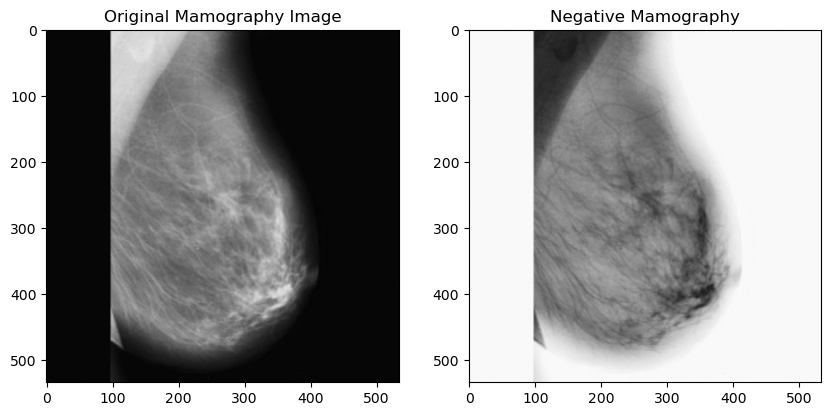

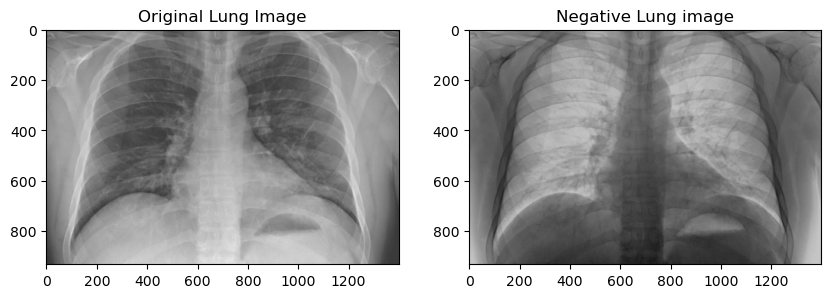

In [66]:
# Read image mammogram
orig_img = cv2.imread('simple_img_process/img_ex_4.png')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
img_neg = 255 - orig_img

# Read image lungs
orig_img2 = cv2.imread('simple_img_process/img_ex_5.tiff')
orig_img2 = cv2.cvtColor(orig_img2, cv2.COLOR_BGR2RGB)
img_neg2 = 255 - orig_img2

# Plot images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(orig_img)
axs[0].set_title('Original Mamography Image')
axs[1].imshow(img_neg)
axs[1].set_title('Negative Mamography')
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(orig_img2)
axs[0].set_title('Original Lung Image')
axs[1].imshow(img_neg2)
axs[1].set_title('Negative Lung image')
plt.show()

# Part 3.-


**Gamma Correction**


Adaptive Gamma Correction (AGC) to properly enhance image contrast where AGC parameters are dynamically set based on image information.

This is useful in various ways:
• Our eyes do not perceive light in the same way that cameras do. We perceive a fraction of the light, which can be well represented in the following graph.
 
 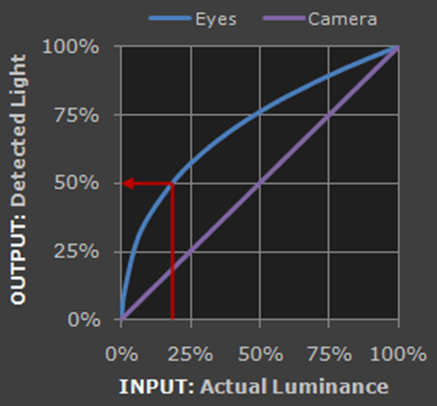

Compared to a camera, we are much more sensitive to dark tone fields compared to light ones. Biologically, this allows us to have a vision in a higher range of illumination; otherwise, simply going outside would be too overwhelming for our eyesight.

• Images encoded with gamma store tones more efficiently. Since gamma encoding redistributes tonal levels closer to how our eyes perceive them, fewer bits are required to describe a given tonal range. Otherwise, an excess of bits would be dedicated to describing the brighter tones (where the camera is relatively more sensitive), and there would be a shortage of bits to describe the darker tones (where the camera is relatively less sensitive).

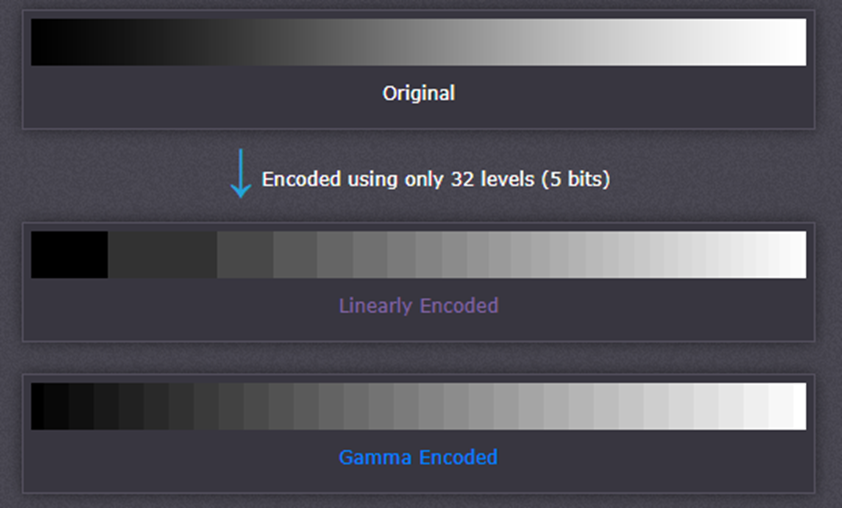
 
**Aplication Area**

Since digital cameras have become affordable, people have been capturing a large amount of images in everyday life. These images are often affected by atmospheric changes, poor quality of image capture devices, lack of experience of the operator, etc. In many cases, these images may require enhancements to make them more acceptable to the general public. Moreover, image contrast enhancement is necessary due to its wide range of applications in areas such as atmospheric sciences, astrophotography, medical image processing, satellite image analysis, texture analysis and synthesis, and telecommunications.



Example of astrophotography

An image of the moon is obtained, but the image itself appears "washed out." In this case, we can use gamma correction to improve our image.

Power-law (gamma) transformations can be mathematically expressed as **s = cr^gamma.** Gamma correction is important for accurately displaying images on a screen, to prevent images from becoming discolored or darkened when viewed from different types of monitors with different display settings.





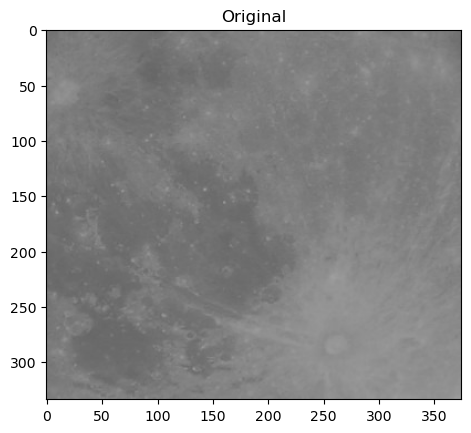

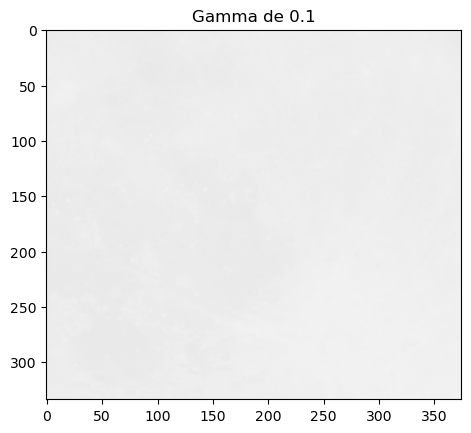

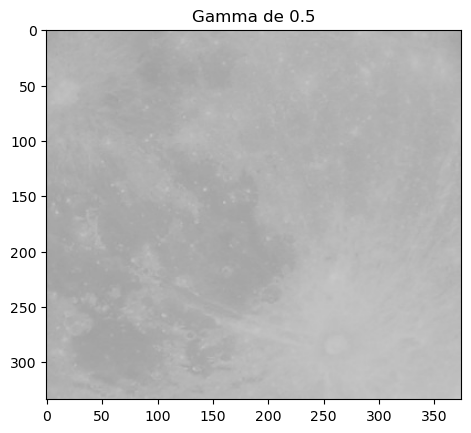

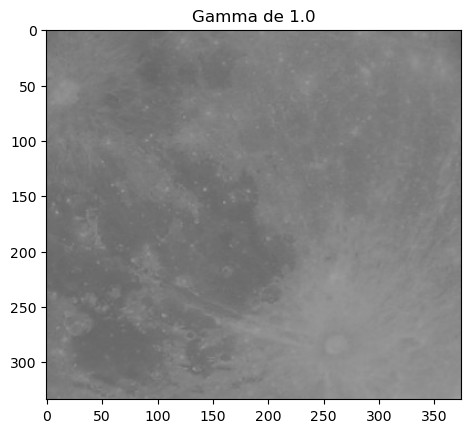

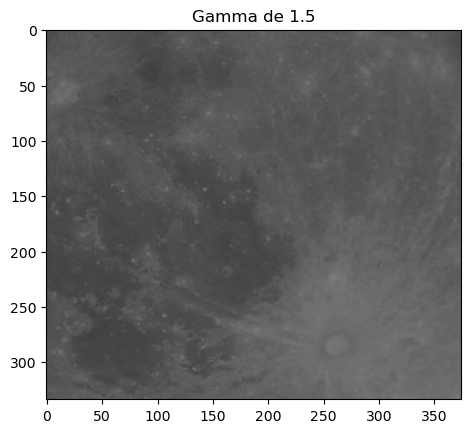

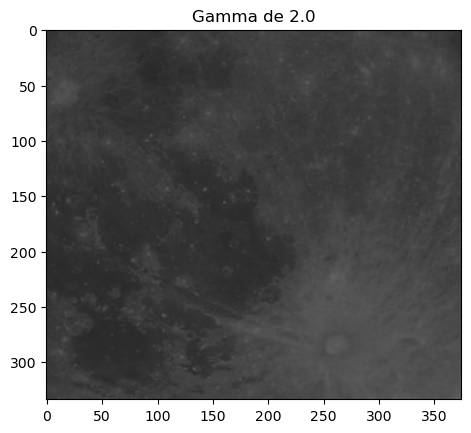

In [67]:
# We open the image
img = cv2.imread("simple_img_process/img_ex_6.jpg")

plt.title("Original")
plt.imshow(img)
plt.show()
  
# Trying a few gamma values.
for gamma in [0.1, 0.5, 1.0, 1.5, 2.0]:
      
    # Apply gamma correction.
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')
  
    plt.title(f"Gamma de {gamma}")
    plt.imshow(gamma_corrected)
    plt.show()


In the end, we can see how we achieve better results with much more detail by applying a gamma of 2.0 to the original image.

Otherwise, by reducing the amount of gamma, the image is completely lost, as with the use of a gamma of 0.1 on the original image.

# Part 4.-


The following are some examples of applications where image subtraction is used:

Security: It is used to detect movement and objects in surveillance camera images and to generate alerts in case of suspicious activity.

Medicine: It is used to eliminate noise and improve the quality of images in magnetic resonance imaging and computed tomography.

Astronomy: It is used to remove noise and improve the quality of images taken by telescopes and satellites.

Robotics: It is used to detect objects and navigate in unknown environments by comparing images taken at different times.

Agriculture: It is used to detect and count objects such as crops and pests in images of agricultural fields.

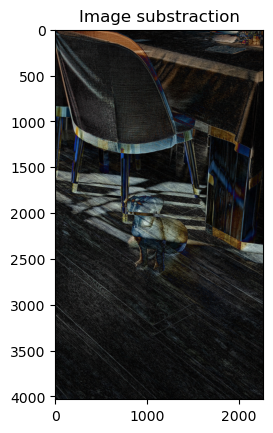

In [68]:
#Demo with images

# Load images
img_a = cv2.imread("simple_img_process/img_ex_7.jpg")
img_b = cv2.imread("simple_img_process/img_ex_8.jpg")

# Substract images
result = cv2.absdiff(img_a, img_b)

# Show the result
plt.title("Image substraction")
plt.imshow(result)

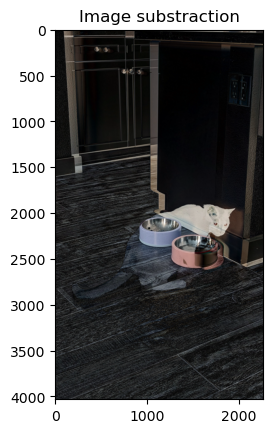

In [69]:
# Demo with images
# Suppose we wanted to know who ate the plate of food
# Load images
img_c = cv2.imread("simple_img_process/img_ex_9.jpg")
img_d = cv2.imread("simple_img_process/img_ex_10.jpg")

# Subctract images
result = cv2.absdiff(img_c, img_d)

# Show the resultant image
plt.title("Image substraction")
plt.imshow(result)

# Bibliograhy

Part 1:

* Kooi, T. (2021, abril 16). Photometric data augmentation in projection radiography. Lunit Team Blog. https://medium.com/lunit/photometric-data-augmentation-in-projection-radiography-bed3ae9f55c3

* Mumuni, A., & Mumuni, F. (2022). Data augmentation: A comprehensive survey of modern approaches. Array (New York, N.Y.), 16(100258), 100258. https://doi.org/10.1016/j.array.2022.100258

Part 2:

* Gonzalez, R. C., Woods, R. E. (2008). Digital image processing. Upper Saddle River, N.J.: Prentice Hall. ISBN: 9780131687288 013168728X 9780135052679 013505267X
* Universidad de Sevilla, Imágenes de rayos X de los pulmones para diagnosticar la COVID-19, Recuperado, 26 de enero 2023, https://www.us.es/actualidad-de-la-us/imagenes-de-rayos-x-de-los-pulmones-para-diagnosticar-la-covid-19

Part 3:

* Tina. (2023, January 11). Discovering opencv with python: Gamma correction. DEV Community. Retrieved January 26, 2023, from https://dev.to/tinazhouhui/discovering-opencv-with-python-gamma-correction-3cnh

* Understanding gamma correction. Understanding Gamma Correction. (n.d.). Retrieved January 26, 2023, from https://www.cambridgeincolour.com/tutorials/gamma-correction.htm 

* Rahman, S., Rahman, M. M., Abdullah-Al-Wadud, M., Al-Quaderi, G. D., &amp; Shoyaib, M. (2016, October 18). An adaptive gamma correction for Image Enhancement - EURASIP Journal on image and video processing. SpringerOpen. Retrieved January 26, 2023, from https://jivp-eurasipjournals.springeropen.com/articles/10.1186/s13640-016-0138-1


Part 4:

* Alarcón-Rodríguez, J., Fernández-Velilla, M., Ureña-Vacas, A., Martín-Pinacho, J. J., Rigual-Bobillo, J. A., Jaureguízar-Oriol, A., & Gorospe-Sarasúa, L. (2021). Manejo y seguimiento radiológico del paciente post-COVID-19 [Radiological management and follow-up of post-COVID-19 patients]. Radiologia, 63(3), 258–269. https://doi.org/10.1016/j.rx.2021.02.003

* Gonzalez, R. C., Woods, R. E. (2008). Digital image processing. Upper Saddle River, N.J.: Prentice Hall. ISBN: 9780131687288 013168728X 9780135052679 013505267X

* Klette, R. Schlüns, K. "Computer Vision: Models, Learning, and Inference", Cambridge University Press, 2014

* Nanehkaran, Y.A., Zhang, D., Chen, J. et al. Recognition of plant leaf diseases based on computer vision. J Ambient Intell Human Comput (2020). https://doi.org/10.1007/s12652-020-02505-x